1° Problema de negócio

Precisamos prever o resultado da temporada de colheita, ou seja, se a cultura seria:

1. Saudável(viva)
2. Danificada por pesticidas ou 
3. Danificada por outros 

Os dados são baseados em safras colhidas por vários agricultores no final da temporada de colheita 


In [2]:
#Importação das bibliotecas 

import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from catboost import CatBoostClassifier 
from xgboost import plot_importance
import warnings 
warnings.filterwarnings ("ignore")

In [3]:
train_d=pd.read_csv('C:/Users/cassi/Desktop/projetos IA/Maquina preditiva pesticida/treino.csv')

In [4]:
#Vizualização dos dados 
train_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [5]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


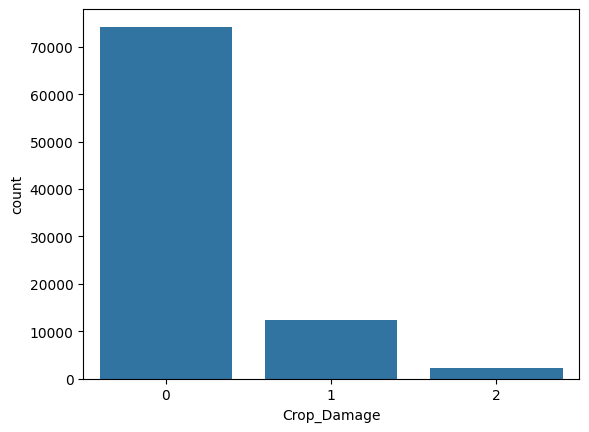

In [6]:
# Explorando a variável resposta 
train_d['Crop_Damage'].value_counts()
ax = sns.countplot(x=train_d['Crop_Damage'])

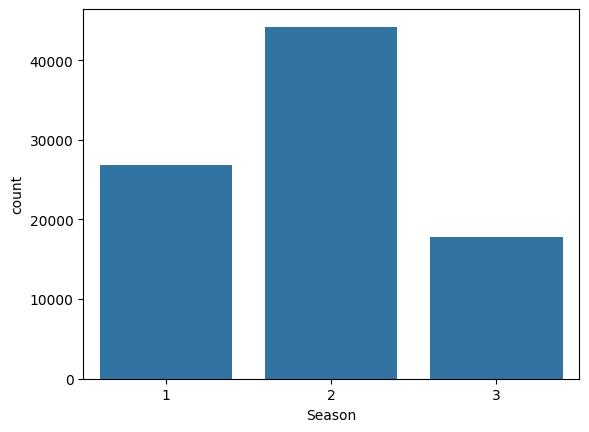

In [7]:
#Explorando a Variável 
train_d['Season'].value_counts()
ax = sns.countplot(x=train_d['Season'])

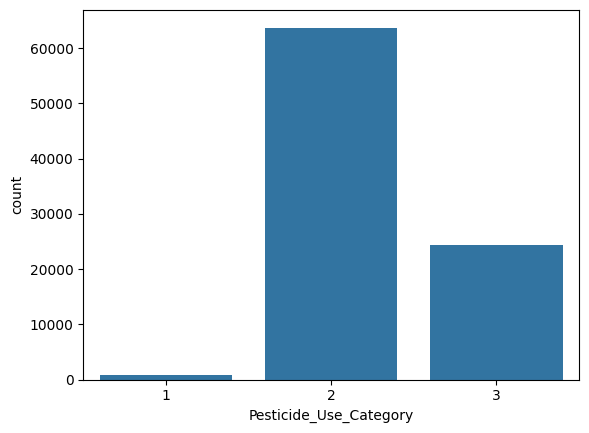

In [8]:
train_d['Pesticide_Use_Category'].value_counts()
ax = sns.countplot(x=train_d['Pesticide_Use_Category'])

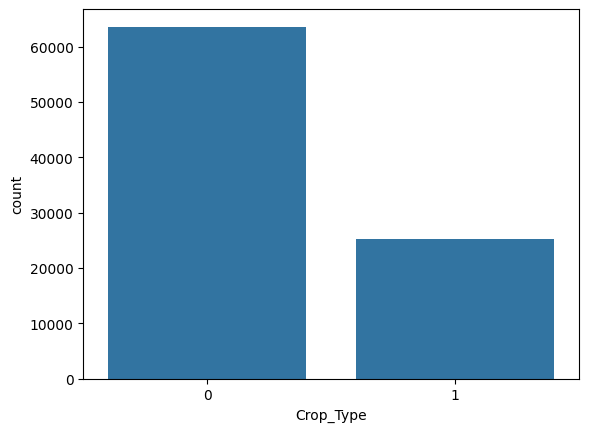

In [9]:
train_d['Crop_Type'].value_counts()
ax = sns.countplot(x=train_d['Crop_Type'])

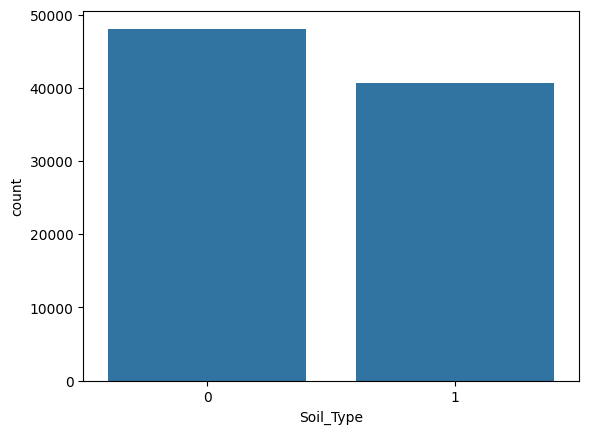

In [10]:
train_d['Soil_Type'].value_counts()
ax = sns.countplot(x=train_d['Soil_Type'])

In [11]:
#Verificando valores nulos
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [12]:
#Verificando valores duplicados 
train_d.duplicated().sum()

0

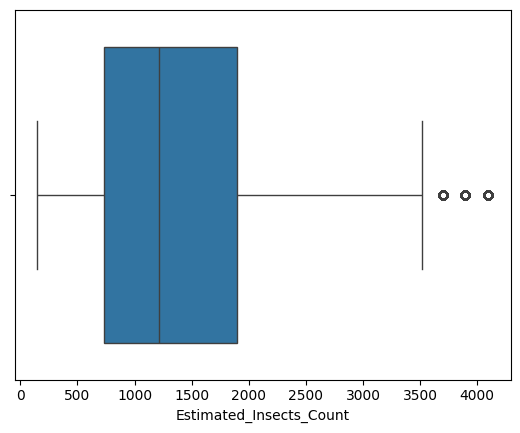

In [13]:
train_d["Estimated_Insects_Count"].describe()
ax = sns.boxplot(x=train_d["Estimated_Insects_Count"])

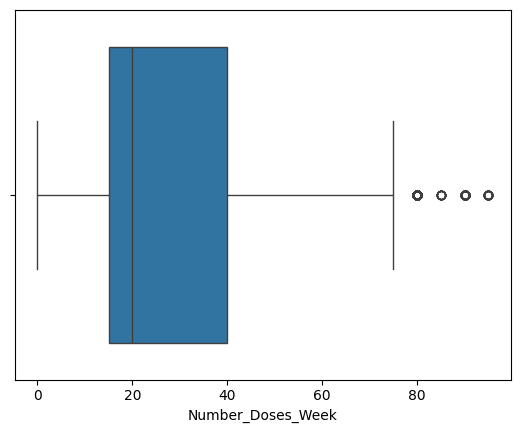

In [14]:
train_d["Number_Doses_Week"].describe()
ax = sns.boxplot(x=train_d["Number_Doses_Week"])

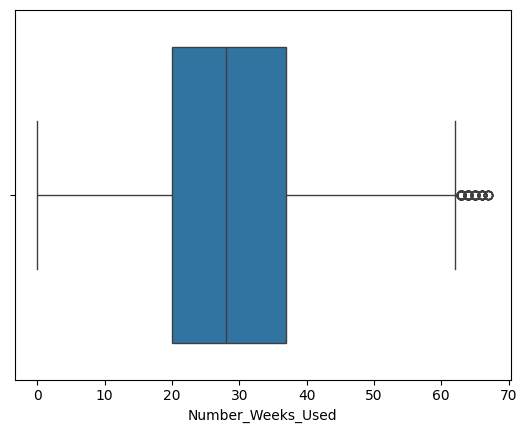

In [15]:
train_d["Number_Weeks_Used"].describe()
ax = sns.boxplot(x=train_d["Number_Weeks_Used"])

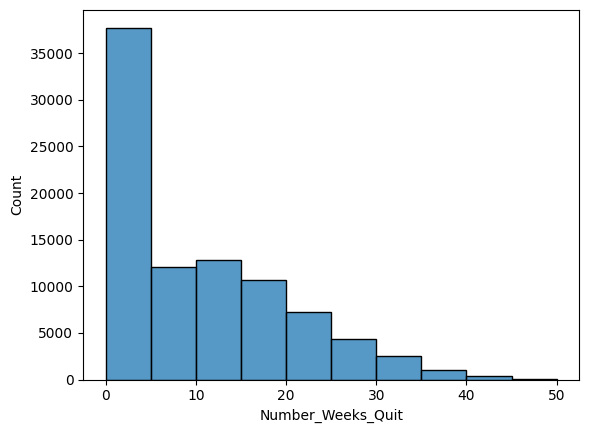

In [16]:
train_d['Number_Weeks_Quit'].describe()
ax = sns.histplot(x=train_d["Number_Weeks_Quit"],bins = 10)

Pré- Processamento dos Dados

In [17]:
#Excluir a variável ID pois ela não é explicativa 
train_d.drop('ID', axis=1,inplace=True)
train_d.head()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [18]:
#Exclusão dos valores ausentes
train_d.dropna(inplace=True)


In [19]:
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [20]:
#Onde-Hot Encoder - Criação de Variáveis Numéricas
for col in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']:
    train_d = pd.get_dummies(train_d,columns=[col])


In [21]:
train_d.head(2)
train_d.shape

(79858, 15)

In [22]:
# Split dataset 
x = train_d.drop(['Crop_Damage'], axis = 1)
y = train_d['Crop_Damage'].values.reshape(-1,1)

#Amostragem dos dados de treino e de teste 
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)


Construção das máquinas preditivas 

In [23]:
Maquina_Preditiva = CatBoostClassifier(n_estimators=1000, max_depth=4, random_state=7)
Maquina_Preditiva.fit(x_train, y_train)
predicoes = Maquina_Preditiva.predict_proba(x_test)


Learning rate set to 0.097814
0:	learn: 0.9832092	total: 173ms	remaining: 2m 53s
1:	learn: 0.8949168	total: 184ms	remaining: 1m 31s
2:	learn: 0.8266158	total: 198ms	remaining: 1m 5s
3:	learn: 0.7706912	total: 211ms	remaining: 52.5s
4:	learn: 0.7241909	total: 222ms	remaining: 44.2s
5:	learn: 0.6857756	total: 232ms	remaining: 38.4s
6:	learn: 0.6533072	total: 246ms	remaining: 34.9s
7:	learn: 0.6249385	total: 257ms	remaining: 31.9s
8:	learn: 0.6010892	total: 266ms	remaining: 29.2s
9:	learn: 0.5798398	total: 277ms	remaining: 27.4s
10:	learn: 0.5617840	total: 288ms	remaining: 25.9s
11:	learn: 0.5470850	total: 297ms	remaining: 24.4s
12:	learn: 0.5335494	total: 311ms	remaining: 23.6s
13:	learn: 0.5221289	total: 324ms	remaining: 22.8s
14:	learn: 0.5116100	total: 337ms	remaining: 22.1s
15:	learn: 0.5023982	total: 349ms	remaining: 21.4s
16:	learn: 0.4942070	total: 363ms	remaining: 21s
17:	learn: 0.4877251	total: 376ms	remaining: 20.5s
18:	learn: 0.4815039	total: 391ms	remaining: 20.2s
19:	learn: 

In [24]:
#Score do modelo nos dados de teste
result = Maquina_Preditiva.score(x_test, y_test)
print('Acurácia nos dados de teste: %.3f%%' %(result * 100))

Acurácia nos dados de teste: 80.103%


In [25]:
#Determinar as variáveis Mais Importantes 
Maquina_Preditiva.feature_importances_

array([21.36537105, 18.29952221, 25.22084161, 11.53187023,  1.84298933,
        1.66553058,  0.92037955,  0.57402227,  0.59774609,  9.50784327,
        6.34740699,  0.78616794,  0.56192349,  0.7783854 ])

In [26]:
train_d.to_csv('dados_tratados.csv', index=False)
